In [ ]:
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
data = california.frame

# Display the first few rows of the dataset
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


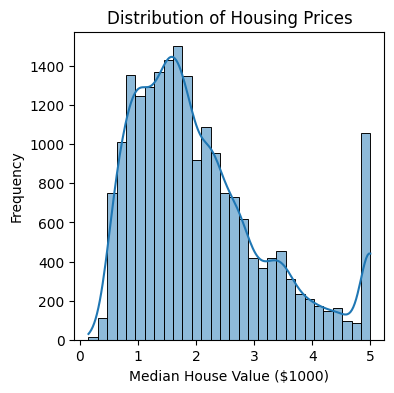

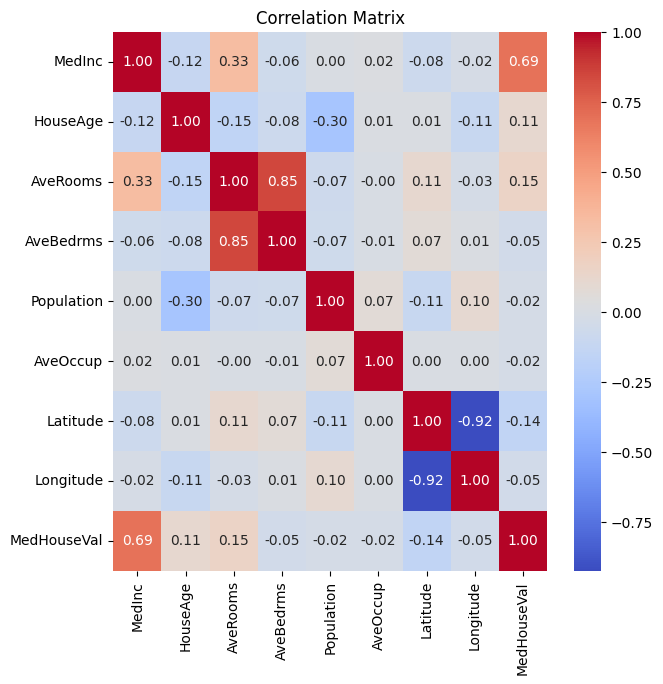

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of housing prices
plt.figure(figsize=(4,4))
sns.histplot(data['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Median House Value ($1000)')
plt.ylabel('Frequency')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test_scaled)


Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451


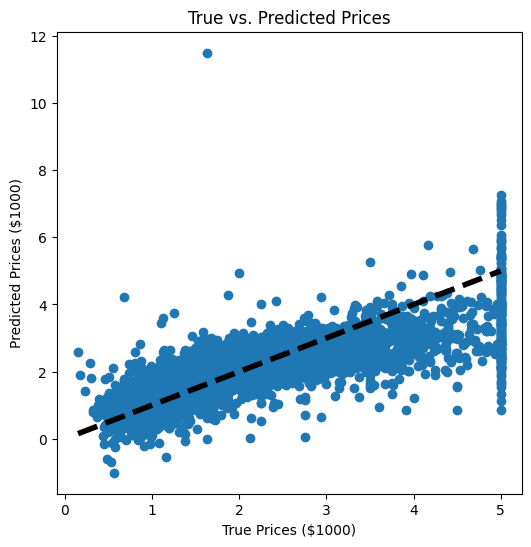

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the true vs. predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Prices ($1000)')
plt.ylabel('Predicted Prices ($1000)')
plt.title('True vs. Predicted Prices')
plt.show()
